In [1]:
from pytorch_lightning import Trainer
#import active_dynamicmemory.ActiveDynamicMemoryModel as activedm

import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.utils.data import DataLoader
import os
import torchvision.models as models
import torch.nn as nn
import torch
import torch.nn.functional as F
import argparse
import pytorch_lightning as pl
import sklearn 
from sklearn.metrics import confusion_matrix, auc, roc_curve
import torch
import pandas as pd
import pickle
from py_jotools import mut, slurm, cache
import numpy as np
import gc

import hashlib
import dill
#import active_catinous.utils as cutils

from sklearn.metrics import mean_absolute_error
from datasets.ContinuousDataset import LIDCContinuous
from datasets.BatchDataset import LIDCBatch
import yaml
import active_dynamicmemory.runutils as rutils
%load_ext autoreload
%autoreload 

In [2]:
def train_config(configfile, remote=False, runs=None, jobarray=False):
    with open(configfile) as f:
        params = yaml.load(f, Loader=yaml.FullLoader)

    if remote:
        with open('training_configs/slurm_config.yml') as s:
            sparams = yaml.load(s, Loader=yaml.FullLoader)

    if jobarray:
        sparams['qos'] = 'jobarray'

    if runs is None:
        if remote:
            print('scheduling job to CIR cluster...')
            slurm.srun(rutils.trained_model, [params['trainparams'], params['settings']], params=sparams, remote=True)
        else:
            model, logs, df_mem, exp_name = rutils.trained_model(params['trainparams'], params['settings'])
            print('successfully trained model', exp_name)
    else:
        for i in range(runs):
            params['trainparams']['seed'] = i+1
            params['trainparams']['run_postfix'] = i+1
            if remote:
                print('scheduling job to CIR cluster...')
                slurm.srun(rutils.trained_model, [params['trainparams'], params['settings']], params=sparams, remote=True)
            else:
                model, logs, df_mem, exp_name = rutils.trained_model(params['trainparams'], params['settings'])
                print('successfully trained model', exp_name)

In [3]:
def train_params(params, remote=False, runs=None, jobarray=False):
    if remote:
        with open('training_configs/slurm_config.yml') as s:
            sparams = yaml.load(s, Loader=yaml.FullLoader)

    if jobarray:
        sparams['qos'] = 'jobarray'

    if runs is None:
        if remote:
            print('scheduling job to CIR cluster...')
            slurm.srun(rutils.trained_model, [params['trainparams'], params['settings']], params=sparams, remote=True)
        else:
            model, logs, df_mem, exp_name = rutils.trained_model(params['trainparams'], params['settings'])
            print('successfully trained model', exp_name)
    else:
        for i in range(runs):
            params['trainparams']['seed'] = i+1
            params['trainparams']['run_postfix'] = i+1
            if remote:
                print('scheduling job to CIR cluster...')
                slurm.srun(rutils.trained_model, [params['trainparams'], params['settings']], params=sparams, remote=True)
            else:
                model, logs, df_mem, exp_name = rutils.trained_model(params['trainparams'], params['settings'])
                print('successfully trained model', exp_name)

In [ ]:
with open(f'./training_configs/lidc_joint.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

for scanner in ['ges', 'geb', 'sie', 'lndb']:
    params['trainparams']['scanner'] = scanner
    
    train_params(params, remote=True, runs=5, jobarray=True)

Epoch 0:  41%|████▏     | 121/292 [02:28<03:30,  1.23s/it, loss=0.0508, v_num=0]

In [4]:
train_config('training_configs/lidc_casa.yml', remote=False)

['ges'] scanners
['base'] split
gram matrix init elements (262144,)
fit sparse projection


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | model      | FasterRCNN | 41.3 M
1 | stylemodel | ResNet     | 25.6 M
------------------------------------------
66.6 M    Trainable params
222 K     Non-trainable params
66.9 M    Total params
267.445   Total estimated model params size (MB)


center [ 3.85399991e-20 -3.81164826e-20  0.00000000e+00  3.64224167e-20
  4.40457133e-20 -4.44692297e-20  3.49401091e-20 -2.10699446e-20
 -1.65171425e-20 -2.38492714e-20 -3.81164826e-21 -7.62329653e-21
  1.49355731e-20  1.69406589e-21 -8.99972506e-21 -1.10114283e-20
 -2.51462906e-21  4.34104385e-21 -6.14098887e-21 -1.79994501e-21
 -1.32348898e-21 -8.54312137e-21 -2.03287907e-20 -3.99693672e-21
  1.37642854e-21 -3.49401091e-21  0.00000000e+00 -6.35274710e-21
 -9.21148330e-21 -2.75285708e-21] {0: 2.70253565799824e-07}
trans_init [[-1.61773531e-03 -4.32922272e-04 -5.08038319e-04  2.05812119e-04
   6.97969107e-05 -9.91708495e-05 -5.76519327e-04 -1.72156209e-04
   1.07971018e-04  9.68210572e-05  7.61883514e-05  2.49413074e-04
  -3.35260665e-05 -2.41690757e-04 -5.37651261e-05  1.52237440e-04
  -1.01175087e-04 -1.00548995e-04 -1.36922855e-04 -7.42818245e-05
   4.58197698e-05  3.79982267e-05  1.42617005e-04  1.23625815e-04
   1.42512712e-04  1.22316002e-04  2.04166117e-05  3.49318555e-05
  -7.

/home/mperkonigg/venv_test/venv/local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Validation sanity check:  50%|█████     | 1/2 [00:00<00:00,  1.60it/s]

/home/mperkonigg/venv_test/venv/local/lib/python3.6/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


['ges', 'geb', 'sie', 'lndb']                                         
Epoch 0:   0%|          | 0/616 [00:00<?, ?it/s] predicted domain -1
predicted domain 0
predicted domain -1
predicted domain 0
Epoch 0:   0%|          | 1/616 [00:01<14:03,  1.37s/it, loss=nan, v_num=0]

/home/mperkonigg/venv_test/venv/local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: training_step returned None. If this was on purpose, ignore this warning...
  warnings.warn(*args, **kwargs)


predicted domain 0
predicted domain 0
predicted domain 0
predicted domain 0
Epoch 0:   0%|          | 2/616 [00:01<08:17,  1.23it/s, loss=nan, v_num=0]predicted domain 0
predicted domain -1
predicted domain 0
predicted domain -1
Epoch 0:   0%|          | 3/616 [00:01<06:22,  1.60it/s, loss=nan, v_num=0]predicted domain 0
predicted domain 0
predicted domain 0
predicted domain -1
Epoch 0:   1%|          | 4/616 [00:02<05:15,  1.94it/s, loss=nan, v_num=0]predicted domain 0
predicted domain 0
predicted domain 0
predicted domain 0
Epoch 0:   1%|          | 5/616 [00:02<04:35,  2.22it/s, loss=nan, v_num=0]predicted domain 0
predicted domain 0
predicted domain 0
predicted domain 0
Epoch 0:   1%|          | 6/616 [00:02<04:06,  2.47it/s, loss=nan, v_num=0]predicted domain 0
predicted domain -1
predicted domain -1
predicted domain 0
Epoch 0:   1%|          | 7/616 [00:02<03:51,  2.63it/s, loss=nan, v_num=0]predicted domain 0
predicted domain 0
predicted domain 0
predicted domain 0
Epoch 0:   1%

In [6]:
df = pd.read_csv('/project/catinous/lungnodulesfinallndbBig.csv')

In [7]:
df.groupby(['split', 'scanner']).count()

dataset  patient_id  image   x1   x2   y1   y2  bin_malignancy
split scanner                                                                
base  ges          253         253    253  253  253  253  253             253
test  geb           26          26     26   26   26   26   26              26
      ges           85          85     85   85   85   85   85              85
      lndb          91          91     91   91   91   91   91              91
      sie           18          18     18   18   18   18   18              18
train geb          166         166    166  166  166  166  166             166
      ges          136         136    136  136  136  136  136             136
      lndb         479         479    479  479  479  479  479             479
      sie          102         102    102  102  102  102  102             102
val   geb           23          23     23   23   23   23   23              23
      ges           53          53     53   53   53   53   53              53
      lndb          55          55     55   55   55   55   55              55
      sie           10          10     10   10   10   10   10              10

In [8]:
883/5

176.6

In [5]:
import pandas as pd
#from datasets.BrainAgeContinuous import BrainAgeContinuous
#from datasets.BrainAgeDataset import BrainAgeDataset
#from datasets.CatsinomDataset import CatsinomDataset
#from datasets.LIDCDataset import LIDCDataset
from models.unet3d import EncoderModelGenesis
import torchvision.models as tvmodels
import torch
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from statsmodels.distributions.empirical_distribution import ECDF
#import statsmodels.api as sm

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

from scipy.stats import gaussian_kde, norm, multivariate_normal
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import torch.nn as nn

#from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import seuclidean, euclidean, mahalanobis, pdist, squareform
from sklearn.random_projection import SparseRandomProjection
import active_dynamicmemory.utils as cutils
import pickle
from datasets.BatchDataset import CardiacBatch
from active_dynamicmemory.ActiveDynamicMemory import MemoryItem
from datasets.ContinuousDataset import CardiacContinuous
import random
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import pdist, squareform


In [6]:
def gram_matrix(input):
    # taken from: https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    grams = []

    for i in range(a):
        features = input[i].view(b, c * d)  # resise F_XL into \hat F_XL
        G = torch.mm(features, features.t())  # compute the gram product
        grams.append(G.div(b * c * d))

    return grams


def gram_matrix_3d(input, pool_factor=1):
    # taken from: https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
    a, b, c, d, e = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    grams = []

    for i in range(a):
        features = input[i].view(b, c * d * e)  # resise F_XL into \hat F_XL
        G = torch.mm(features, features.t())  # compute the gram product
        if pool_factor==1:
            grams.append(G.div(b * c * d * e))
        else:
            pool = nn.MaxPool2d(pool_factor)
            gram = G.div(b * c * d * e)
            gram_pooled = pool(gram[None, :])
            grams.append(gram_pooled[0])

    return grams

def gram_hook(m, input, output):
    grammatrices.append(gram_matrix_3d(input[0]))

def register_hooks():
    for layer in gramlayers:
        layer.register_forward_hook(gram_hook)
        
def gram_hook_2d(m, input, output):
    grammatrices.append(gram_matrix(input[0]))

def register_hooks_2d(layers):
    for layer in layers:
        layer.register_forward_hook(gram_hook_2d)

In [7]:
stylemodel = tvmodels.resnet50(pretrained=True)
gramlayers = [stylemodel.layer2[-1].conv1]
register_hooks_2d(gramlayers)
stylemodel.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
import active_dynamicmemory.LIDCutils as lutils
dl_base = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinallndbBig.csv',
                                            iterations=None,
                                            batch_size=4,
                                            split=['base']),
                              batch_size=4, num_workers=8, drop_last=True,
                              collate_fn=lutils.collate_fn)

dl_train = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinallndbBig.csv',
                                            iterations=None,
                                            batch_size=4,
                                            split=['train']),
                              batch_size=4, num_workers=8, drop_last=True,
                              collate_fn=lutils.collate_fn)

In [9]:
base_grams = []
for batch in dl_base:
    grammatrices=[]
    _ = stylemodel(torch.stack(batch[0]))
    
    for i in range(len(batch)):
        base_grams.append(grammatrices[0][i].detach().cpu().numpy().flatten())    

In [17]:
len(grammatrices[0])

4

In [12]:
colors = []
emb_grams = []
for batch in dl_train:
    grammatrices=[]
    _ = stylemodel(torch.stack(batch[0]))
    
    for i in range(len(batch)):
        emb_grams.append(grammatrices[0][i].detach().cpu().numpy().flatten())    
    for scanner in batch[2]:
        if scanner == 'ges':
            colors.append(0)
        elif scanner == 'geb':
            colors.append(1)
        elif scanner=='sie':
            colors.append(2)
        else:
            colors.append(3)

In [10]:
pca = PCA(n_components=30, random_state=1).fit(base_grams)
#trans_grams = pca.transform(emb_grams)
trans_base = pca.transform(base_grams)

In [12]:
init_center = trans_base[:128].mean(axis=0)
print(init_center)

[-5.16928231e-04  1.63341911e-04  1.30171633e-04 -1.15853319e-04
  3.86028857e-05  1.96249395e-05 -8.13421445e-06 -8.88437801e-06
  1.49158795e-05  9.12531830e-06  3.86888766e-05 -1.60823763e-05
 -4.94444787e-05  1.32860261e-06  6.52455567e-06 -9.15483000e-06
 -1.21693476e-06 -5.23677750e-06 -6.79999902e-06 -3.71567634e-06
  5.67962578e-06  7.16657842e-07 -9.06617616e-06  3.48899602e-06
 -1.11281512e-05  4.90573492e-06 -3.63730138e-06 -3.78311466e-06
  4.20668795e-06  5.35542320e-06]


In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
elements_tsne = tsne.fit_transform(emb_grams)
plt.scatter(elements_tsne[:, 0], elements_tsne[:, 1], c=colors, cmap='Set1')

In [14]:
grams = []
grams.extend(trans_base)
grams.extend(trans_grams)


grams.append(trans_grams[:135].mean(axis=0)) #center ges
grams.append(trans_grams[136:301].mean(axis=0)) #center geb
grams.append(trans_grams[302:403].mean(axis=0)) #center sie
grams.append(trans_grams[403:].mean(axis=0)) #center lndb

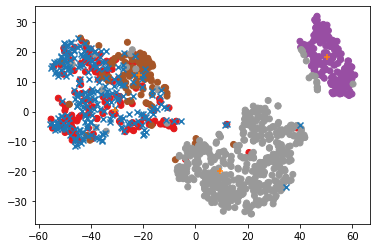

In [15]:
tsne = TSNE(n_components=2, perplexity=30)
elements_tsne = tsne.fit_transform(grams)
plt.scatter(elements_tsne[:, 0][len(base_grams):-4], elements_tsne[:, 1][len(base_grams):-4], c=colors, cmap='Set1')
plt.scatter(elements_tsne[:, 0][:len(base_grams)], elements_tsne[:, 1][:len(base_grams)], cmap='Set1', marker='x')

plt.scatter(elements_tsne[:, 0][-4:], elements_tsne[:, 1][-4:], marker='+')

In [16]:
center_ges = trans_grams[:135].mean(axis=0)
center_geb = trans_grams[136:301].mean(axis=0)
center_sie = trans_grams[302:403].mean(axis=0)
center_lndb = trans_grams[403:].mean(axis=0)

In [25]:
class MemoryItem():

    def __init__(self, img, target, filepath, scanner, current_grammatrix=None, pseudo_domain=None):
        self.img = img
        self.target = target
        self.filepath = filepath
        self.scanner = scanner
        self.counter = 0
        self.traincounter = 0
        self.deleteflag = False
        self.pseudo_domain = pseudo_domain
        self.current_grammatrix = current_grammatrix

In [41]:
def get_domain_count(memory, pd):
    c = 0
    for mi in memory:
        if mi.pseudo_domain==pd:
            c += 1
    return c

def find_insert_position(memorylist):
    for idx, item in enumerate(memorylist):
        if item.deleteflag:
            return idx
    return -1

def find_random_insert(memorylist, pd):
    positions = []
    for idx, item in enumerate(memorylist):
        if item.pseudo_domain==pd:
            positions.append(idx)
    random.shuffle(positions)
    return positions[0]

def get_gm_list(memory):
    grams = []
    for mi in memory:
        grams.append(mi.current_grammatrix)
    return grams

def flag_for_deletion(memory, domain_count, max_per_domain):
    for k in range(domain_count):
        domain_count = get_domain_count(memory, k)
        if domain_count>max_per_domain:
            todelete = domain_count-max_per_domain
            for item in memory:
                if todelete>0:
                    if item.pseudo_domain==k:
                        if not item.deleteflag:
                            item.deleteflag = True

                        todelete -= 1

In [50]:
memory_list = []

for tb in trans_base[:memory_maximum]:
    mi = MemoryItem(None, None, None, 0, current_grammatrix=tb, pseudo_domain=0)
    init_distances.append(mean_squared_error(tb, init_center))
    memory_list.append(mi)

gm_list = get_gm_list(memory_list)

In [60]:
memory_maximum = 128
maximum_per_domain = 128
memory_list = []

init_center = trans_base[:memory_maximum].mean(axis=0)
init_distances = []
for tb in trans_base[:memory_maximum]:
    mi = MemoryItem(None, None, None, 0, current_grammatrix=tb, pseudo_domain=0)
    init_distances.append(mean_squared_error(tb, init_center))
    memory_list.append(mi)
    
max_distances = [np.array(init_distances).mean() * 2]
centers = [init_center]

outliers = []
outliers_label = []
inliers = {0:[]}

for i, tr in enumerate(trans_grams):
    
    out = True
    for j, (center, md) in enumerate(zip(centers, max_distances)):
        if mean_squared_error(tr, center)<md:
            out=False
            print('inlier', colors[i], j)
            mi = MemoryItem(None, None, None, colors[i], current_grammatrix=tr, pseudo_domain=j)
            if get_domain_count(memory_list, j)<maximum_per_domain:
                idx = find_insert_position(memory_list)
                if idx!=-1:
                    memory_list[idx] = mi
                else:
                    print('that shouldnt happen')
            else:
                #replace a random element
                idx = find_random_insert(memory_list, j)
                memory_list[idx] = mi
    if out:
        mi = MemoryItem(None, None, None, colors[i], current_grammatrix=tr, pseudo_domain=None)
        outliers.append(mi)        
        
    if len(outliers)>10:
        distances = squareform(pdist(get_gm_list(outliers)))
        
        distance_list = [np.array(sorted(d)[:10]).sum() for d in distances]
        #print(sorted(distance_list)[5], len(outliers))
        if sorted(distance_list)[5]<0.02:
            to_remove = np.where(np.array(distance_list)<0.025)[0]
            print(to_remove, 'remove')
            new_cluster = []
            new_domain = len(centers)
            
            maximum_per_domain = int(memory_maximum / (len(centers)+1))
            flag_for_deletion(memory_list, len(centers), maximum_per_domain)
            print('new maximum', maximum_per_domain)
            
            for k, r in enumerate(to_remove):
                elem = outliers.pop(r-k)
                elem.pseudo_domain = new_domain
                new_cluster.append(elem)
                
            #insert cluster to memory list
            idx = find_insert_position(memory_list)
            for mi in new_cluster:
                if idx!=-1:
                    memory_list[idx] = mi
                else:
                    print('no insert position')
                        
            print('outliers after removing', len(outliers))
            
            init_distances = []
            new_center = np.array(get_gm_list(new_cluster)).mean(axis=0)
            centers.append(new_center)
            for cm in get_gm_list(new_cluster):
                init_distances.append(mean_squared_error(cm, new_center))
            
            max_distances.append(np.array(init_distances).mean() * 2)

inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0
inlier 0 0

In [62]:
counts = dict()
for k in range(len(max_distances)):
    counts[k] = []
    
for mi in memory_list:
    counts[mi.pseudo_domain].append(mi.scanner)

In [64]:
for k in counts:
    print(np.unique(counts[k], return_counts=True))

(array([0, 2, 3]), array([ 5, 14,  6]))
(array([3]), array([20]))
(array([3]), array([18]))
(array([1]), array([16]))
(array([3]), array([20]))
(array([3]), array([20]))
(array([3]), array([9]))


In [69]:
sd = [np.array(d).sum() for d in distances]
sorted(sd)[5]

0.0350004913369104

In [75]:
coutlier = np.array(outliers).mean(axis=0)

In [79]:
mean_squared_error(coutlier, init_center)

2.5791244596547916e-07

In [78]:
max_distance

3.2803121860030403e-07

In [30]:
errors = []
for tr in trans_grams:
    errors.append([mean_squared_error(center_ges, tr), mean_squared_error(center_geb, tr), mean_squared_error(center_sie, tr), mean_squared_error(center_lndb, tr)])

6.336941308839582e-07

In [35]:
nearest = np.argmin(errors, axis=1)

In [18]:
ges_grams = trans_grams[:127]
random.shuffle(ges_grams)

geb_grams = trans_grams[148:290]
random.shuffle(geb_grams)

sie_grams = trans_grams[296:393]
random.shuffle(sie_grams)

lndb_grams = trans_grams[407:]
random.shuffle(lndb_grams)

In [81]:
ges_clf = IsolationForest(n_estimators=100, contamination=0.10, random_state=1)
ges_clf.fit(ges_grams[:10])

geb_clf = IsolationForest(n_estimators=100, contamination=0.10, random_state=1)
geb_clf.fit(geb_grams[:10])

sie_clf = IsolationForest(n_estimators=100, contamination=0.10, random_state=1)
sie_clf.fit(sie_grams[:10])

lndb_clf = IsolationForest(n_estimators=100, contamination=0.10, random_state=1)
lndb_clf.fit(lndb_grams[:10])

IsolationForest(contamination=0.1, random_state=1)

In [12]:
ges_clf = IsolationForest(n_estimators=10, contamination=0.10, bootstrap=True, random_state=1)
ges_clf.fit(ges_grams[:10])

geb_clf = IsolationForest(n_estimators=10, contamination=0.10,bootstrap=True, random_state=1)
geb_clf.fit(geb_grams[:10])

sie_clf = IsolationForest(n_estimators=10, contamination=0.10, bootstrap=True, random_state=1)
sie_clf.fit(sie_grams[:10])

lndb_clf = IsolationForest(n_estimators=10, contamination=0.10, bootstrap=True, random_state=1)
lndb_clf.fit(lndb_grams[:10])

IsolationForest(bootstrap=True, contamination=0.1, n_estimators=10,
                random_state=1)

In [85]:
pred = []
for i, g in enumerate(emb_grams):
    preds = [ges_clf.decision_function(g.reshape(1, -1)),
            geb_clf.decision_function(g.reshape(1, -1)),
            sie_clf.decision_function(g.reshape(1, -1)),
            lndb_clf.decision_function(g.reshape(1, -1))]
    
    idx = np.argmax(preds)
    if preds[idx]>0:
        pred.append(idx)
    else:
        pred.append(-1)

In [37]:
ges_grams = elements_tsne[:127]
random.shuffle(ges_grams)


ges_clf = IsolationForest(n_estimators=50, contamination='auto', random_state=1)
ges_clf.fit(ges_grams[:10])

pred = ges_clf.predict(ges_grams)

In [43]:
mean_squared_error(trans_grams[0], trans_grams[1])

0.0

In [47]:
trans_grams[3]

array([-9.60449902e-04, -1.13770359e-03, -1.13779250e-03, -1.89725398e-04,
        4.17953086e-04,  2.37943290e-04,  6.20267548e-04, -1.33412024e-04,
       -2.32306083e-04,  7.43584444e-06,  5.21449773e-04, -1.64495309e-04,
       -9.02244298e-05, -2.27923119e-04,  3.98912319e-04, -1.03680396e-04,
        2.45595149e-04, -1.38922704e-04,  1.34853508e-05,  5.82022303e-05,
        5.51452795e-05,  5.54328128e-05,  1.59445060e-04, -1.38521077e-04,
       -6.97105485e-05, -8.22408493e-05, -7.84007895e-05,  5.24961286e-05,
       -6.00560773e-05, -5.32778593e-05])

In [39]:
confusion_matrix(len(pred)*[1], np.array(pred)==1)

array([[  0,   0],
       [112,  15]])

In [34]:
confusion_matrix(len(pred)*[1], np.array(pred)==1)

array([[ 0,  0],
       [74, 53]])

In [21]:
confusion_matrix(np.array(colors)==1, np.array(pred)==1)

array([[707,   7],
       [149,  17]])

In [62]:
#0.10
confusion_matrix(colors, pred)

array([[  0,   0,   0,   0,   0],
       [  4,  54,   2,  76,   0],
       [ 20,  25,  66,  19,  35],
       [  1,  46,   3,  49,   2],
       [ 12,  15, 114, 160, 177]])

In [65]:
#auto
confusion_matrix(colors, pred)

array([[  0,   0,   0,   0,   0],
       [ 14,  38,   1,  83,   0],
       [105,   3,  22,  15,  20],
       [ 22,  20,   0,  58,   1],
       [ 82,   4,  59, 172, 161]])

In [80]:
#est 100 auto
confusion_matrix(colors, pred)

array([[  0,   0,   0,   0,   0],
       [ 11,  52,   2,  70,   1],
       [112,   0,  53,   0,   0],
       [  5,   6,   0,  90,   0],
       [119,   1,  15,  68, 275]])

In [83]:
#est 100 0.10
confusion_matrix(colors, pred)

array([[  0,   0,   0,   0,   0],
       [  1,  21,   1, 112,   1],
       [ 46,   0,  96,  16,   7],
       [  1,   0,   0, 100,   0],
       [ 25,   0,  24,  91, 338]])

In [86]:
#0.10 bootstrap
confusion_matrix(colors, pred)

array([[  0,   0,   0,   0,   0],
       [  2,  81,  10,  39,   4],
       [  2,  19, 107,  14,  23],
       [  0,  58,   1,  41,   1],
       [  2,  73, 150,  51, 202]])

In [6]:
df = pd.read_csv('/project/catinous/lungnodulesfinallndbBig.csv')

In [9]:
df.groupby('split').count()

,dataset,scanner,patient_id,image,x1,x2,y1,y2,bin_malignancy
split,,,,,,,,,
base,253,253,253,253,253,253,253,253,253
test,220,220,220,220,220,220,220,220,220
train,883,883,883,883,883,883,883,883,883
val,141,141,141,141,141,141,141,141,141


In [12]:
round(883/5), round(883/8), round(883/10), round(883/20)

(177, 110, 88, 44)